# **Exploring Relationships**



## **1. Importing Libraries and Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
path = r'/Users/poojathummar/Documents/career Foundary/Data Immersion/Achi 6 Advanced Analytiics & Dashborad Design/cancer a disease/02 Data'


In [6]:
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'Cleaned_lung_cancer_mortality_data.pkl'))

In [8]:
# Check data
df.head()

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,chronologically_sound
0,64,Female,Germany,2016-04-07,Stage III,2016-04-21,False,Never Smoked,31.09375,257,True,True,False,False,Combined,2017-11-15,False,True
1,50,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,True,Passive Smoker,25.90625,208,True,False,False,False,Radiation,2024-04-25,False,True
3,51,Female,Latvia,2016-02-07,Stage III,2016-02-13,True,Former Smoker,34.59375,249,True,True,True,False,Surgery,2017-04-14,True,True
5,50,Male,Finland,2023-01-04,Stage II,2023-01-12,True,Never Smoked,32.59375,300,True,True,False,False,Radiation,2024-03-11,False,True
6,49,Male,Denmark,2018-05-23,Stage IV,2018-05-30,False,Former Smoker,30.09375,300,True,True,False,True,Chemotherapy,2019-07-07,False,True


## **2. Selection of Variables for Exploratory Analysis**

Based on the questions generated in the previous exercise, the following variables would need to be looked at:

**Numerical:**
- age
- bmi
- cholesterol level

Nearly all categorical variables would need to be analysed as well (but this won't be possible for the correlation matrix - boolean values do work, but not very well)

This list ignores geographical and temporal variables. Since the numerical variables may not reveal many useful insights or answer any questions when compared to each other, additional data will be added as a way to broaden the analysis and learn to code/interpret different visualisations in Python. These variables, which will be taken from the ***World Bank***, are:

- Country Population
- Country GDP 
- Country Life Expectancy

Also, the following numeric variables can be derived from the date columns:
- Days under treatment
- Days to start treatment
- ------

### 2.1. Deriving New Variables

In [10]:
# Derive how many days between diagnosis and starting treatment 
df['days_to_start_treatment'] = (df['beginning_of_treatment_date'] - df['diagnosis_date']).dt.days
df['days_under_treatment'] = (df['end_treatment_date'] - df['beginning_of_treatment_date']).dt.days
df.head()

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,chronologically_sound,days_to_start_treatment,days_under_treatment
0,64,Female,Germany,2016-04-07,Stage III,2016-04-21,False,Never Smoked,31.09375,257,True,True,False,False,Combined,2017-11-15,False,True,14,573
1,50,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,True,Passive Smoker,25.90625,208,True,False,False,False,Radiation,2024-04-25,False,True,10,359
3,51,Female,Latvia,2016-02-07,Stage III,2016-02-13,True,Former Smoker,34.59375,249,True,True,True,False,Surgery,2017-04-14,True,True,6,426
5,50,Male,Finland,2023-01-04,Stage II,2023-01-12,True,Never Smoked,32.59375,300,True,True,False,False,Radiation,2024-03-11,False,True,8,424
6,49,Male,Denmark,2018-05-23,Stage IV,2018-05-30,False,Former Smoker,30.09375,300,True,True,False,True,Chemotherapy,2019-07-07,False,True,7,403


### 2.2. Merging Data from the World Bank

In [12]:
# Search countries in dataset for reference when browsing World Bank data:
unique_countries = df['country'].unique()
unique_countries_sorted = sorted(unique_countries)
for index, country in enumerate(unique_countries_sorted, start=1):
    print(f"{index}. {country}")

1. Austria
2. Belgium
3. Bulgaria
4. Croatia
5. Cyprus
6. Czech Republic
7. Denmark
8. Estonia
9. Finland
10. France
11. Germany
12. Greece
13. Hungary
14. Ireland
15. Italy
16. Latvia
17. Lithuania
18. Luxembourg
19. Malta
20. Netherlands
21. Poland
22. Portugal
23. Romania
24. Slovakia
25. Slovenia
26. Spain
27. Sweden


In [16]:
# Upload and check world bank data (Already cleaned and transformed in Excel)
wb_df = pd.read_csv(os.path.join(path, 'Prepared Data', 'World_Bank_Transformed.csv'))
wb_df.head()

,Key,Year,Country,GDP (per capita),GDP growth (annual %),"Life expectancy at birth, total (years)","Population, total"
0,2014 Austria,2014,Austria,51786.37717,0.661273,81.490244,8546356
1,2015 Austria,2015,Austria,44195.81759,1.014502,81.190244,8642699
2,2016 Austria,2016,Austria,45307.58786,1.989437,81.641463,8736668
3,2017 Austria,2017,Austria,47429.15846,2.258572,81.643902,8797566
4,2018 Austria,2018,Austria,51466.55656,2.425385,81.692683,8840521


In [18]:
# Create matching key in  main dataframe
## 1) Extract year from diagnosis_date column
df['diagnosis_year'] = df['diagnosis_date'].dt.year

## 2) Create the 'Key' column by concatenating 'diagnosis_year' and 'country'
df['Key'] = df['diagnosis_year'].astype(str) + " " + df['country']

## 3) Verify key has been made correctly

df.head()

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,...,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,chronologically_sound,days_to_start_treatment,days_under_treatment,diagnosis_year,Key
0,64,Female,Germany,2016-04-07,Stage III,2016-04-21,False,Never Smoked,31.09375,257,...,False,False,Combined,2017-11-15,False,True,14,573,2016,2016 Germany
1,50,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,True,Passive Smoker,25.90625,208,...,False,False,Radiation,2024-04-25,False,True,10,359,2023,2023 Czech Republic
3,51,Female,Latvia,2016-02-07,Stage III,2016-02-13,True,Former Smoker,34.59375,249,...,True,False,Surgery,2017-04-14,True,True,6,426,2016,2016 Latvia
5,50,Male,Finland,2023-01-04,Stage II,2023-01-12,True,Never Smoked,32.59375,300,...,False,False,Radiation,2024-03-11,False,True,8,424,2023,2023 Finland
6,49,Male,Denmark,2018-05-23,Stage IV,2018-05-30,False,Former Smoker,30.09375,300,...,False,True,Chemotherapy,2019-07-07,False,True,7,403,2018,2018 Denmark


In [20]:
# merge dataframes together
df_merged = df.merge(wb_df, on = ["Key"])

In [22]:
# Check shape
df_merged.shape

(2842404, 28)

In [24]:
# Check some rows
df_merged

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,...,days_to_start_treatment,days_under_treatment,diagnosis_year,Key,Year,Country,GDP (per capita),GDP growth (annual %),"Life expectancy at birth, total (years)","Population, total"
0,64,Female,Germany,2016-04-07,Stage III,2016-04-21,False,Never Smoked,31.093750,257,...,14,573,2016,2016 Germany,2016,Germany,42136.12079,2.230000,80.990244,82348669
1,50,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,True,Passive Smoker,25.906250,208,...,10,359,2023,2023 Czech Republic,2023,Czech Republic,28279.57871,-0.128312,78.129715,10647720
2,51,Female,Latvia,2016-02-07,Stage III,2016-02-13,True,Former Smoker,34.593750,249,...,6,426,2016,2016 Latvia,2016,Latvia,14331.75159,2.368615,74.580488,1959537
3,50,Male,Finland,2023-01-04,Stage II,2023-01-12,True,Never Smoked,32.593750,300,...,8,424,2023,2023 Finland,2023,Finland,52292.81851,1.300216,81.231138,5570791
4,49,Male,Denmark,2018-05-23,Stage IV,2018-05-30,False,Former Smoker,30.093750,300,...,7,403,2018,2018 Denmark,2018,Denmark,61591.92887,1.989537,80.953659,5793636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842399,45,Male,Poland,2020-03-11,Stage IV,2020-03-18,False,Current Smoker,31.000000,273,...,7,253,2020,2020 Poland,2020,Poland,15816.82040,-2.020071,76.500000,37899070
2842400,51,Male,Italy,2016-11-16,Stage IV,2016-11-22,True,Current Smoker,41.187500,279,...,6,504,2016,2016 Italy,2016,Italy,30960.73151,1.293463,83.243902,60627498
2842401,45,Male,Finland,2021-07-18,Stage III,2021-07-30,True,Current Smoker,18.203125,187,...,12,229,2021,2021 Finland,2021,Finland,53504.69365,2.838180,81.885366,5541017
2842402,45,Male,Hungary,2020-07-25,Stage I,2020-07-30,False,Passive Smoker,40.187500,271,...,5,578,2020,2020 Hungary,2020,Hungary,16125.60941,-4.535551,75.568293,9750149


In [26]:
# Rename new columns for simplicity and clarity

df_merged.rename(columns = {'GDP (per capita)' : 'Country GDP (per capita)',
                            'GDP growth (annual %)' : 'Country GDP annual growth %',
                            'Life expectancy at birth, total (years)' : 'Country life expectancy',
                            'Population, total' : 'Country population'}, inplace = True)
# Check
df_merged.head()

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,...,days_to_start_treatment,days_under_treatment,diagnosis_year,Key,Year,Country,Country GDP (per capita),Country GDP annual growth %,Country life expectancy,Country population
0,64,Female,Germany,2016-04-07,Stage III,2016-04-21,False,Never Smoked,31.09375,257,...,14,573,2016,2016 Germany,2016,Germany,42136.12079,2.230000,80.990244,82348669
1,50,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,True,Passive Smoker,25.90625,208,...,10,359,2023,2023 Czech Republic,2023,Czech Republic,28279.57871,-0.128312,78.129715,10647720
2,51,Female,Latvia,2016-02-07,Stage III,2016-02-13,True,Former Smoker,34.59375,249,...,6,426,2016,2016 Latvia,2016,Latvia,14331.75159,2.368615,74.580488,1959537
3,50,Male,Finland,2023-01-04,Stage II,2023-01-12,True,Never Smoked,32.59375,300,...,8,424,2023,2023 Finland,2023,Finland,52292.81851,1.300216,81.231138,5570791
4,49,Male,Denmark,2018-05-23,Stage IV,2018-05-30,False,Former Smoker,30.09375,300,...,7,403,2018,2018 Denmark,2018,Denmark,61591.92887,1.989537,80.953659,5793636


In [28]:
# Drop key, year, and diagnosis year columns (and "Country" column carried over from World Bank)
df_merged.drop(columns=['diagnosis_year', 'Key', 'Year', 'Country'], inplace=True)
df_merged.head()

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,...,treatment_type,end_treatment_date,survived,chronologically_sound,days_to_start_treatment,days_under_treatment,Country GDP (per capita),Country GDP annual growth %,Country life expectancy,Country population
0,64,Female,Germany,2016-04-07,Stage III,2016-04-21,False,Never Smoked,31.09375,257,...,Combined,2017-11-15,False,True,14,573,42136.12079,2.230000,80.990244,82348669
1,50,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,True,Passive Smoker,25.90625,208,...,Radiation,2024-04-25,False,True,10,359,28279.57871,-0.128312,78.129715,10647720
2,51,Female,Latvia,2016-02-07,Stage III,2016-02-13,True,Former Smoker,34.59375,249,...,Surgery,2017-04-14,True,True,6,426,14331.75159,2.368615,74.580488,1959537
3,50,Male,Finland,2023-01-04,Stage II,2023-01-12,True,Never Smoked,32.59375,300,...,Radiation,2024-03-11,False,True,8,424,52292.81851,1.300216,81.231138,5570791
4,49,Male,Denmark,2018-05-23,Stage IV,2018-05-30,False,Former Smoker,30.09375,300,...,Chemotherapy,2019-07-07,False,True,7,403,61591.92887,1.989537,80.953659,5793636


## **3. Correlation Matrix and Heatmap**

For this analysis, I am going to take a subset of all the relevant columns.
- Boolean values will also be taken into consideration but any evaluation should note the limitations of Boolean values in correlation matrices.

In [30]:
sub_all = df_merged[['age', 'bmi', 'cholesterol_level', 'days_to_start_treatment', 'days_under_treatment',
                     'Country GDP (per capita)', 'Country life expectancy', 'Country population', 
                     'family_history', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'survived']]

Text(0.5, 1.0, 'Correlation Matrix')

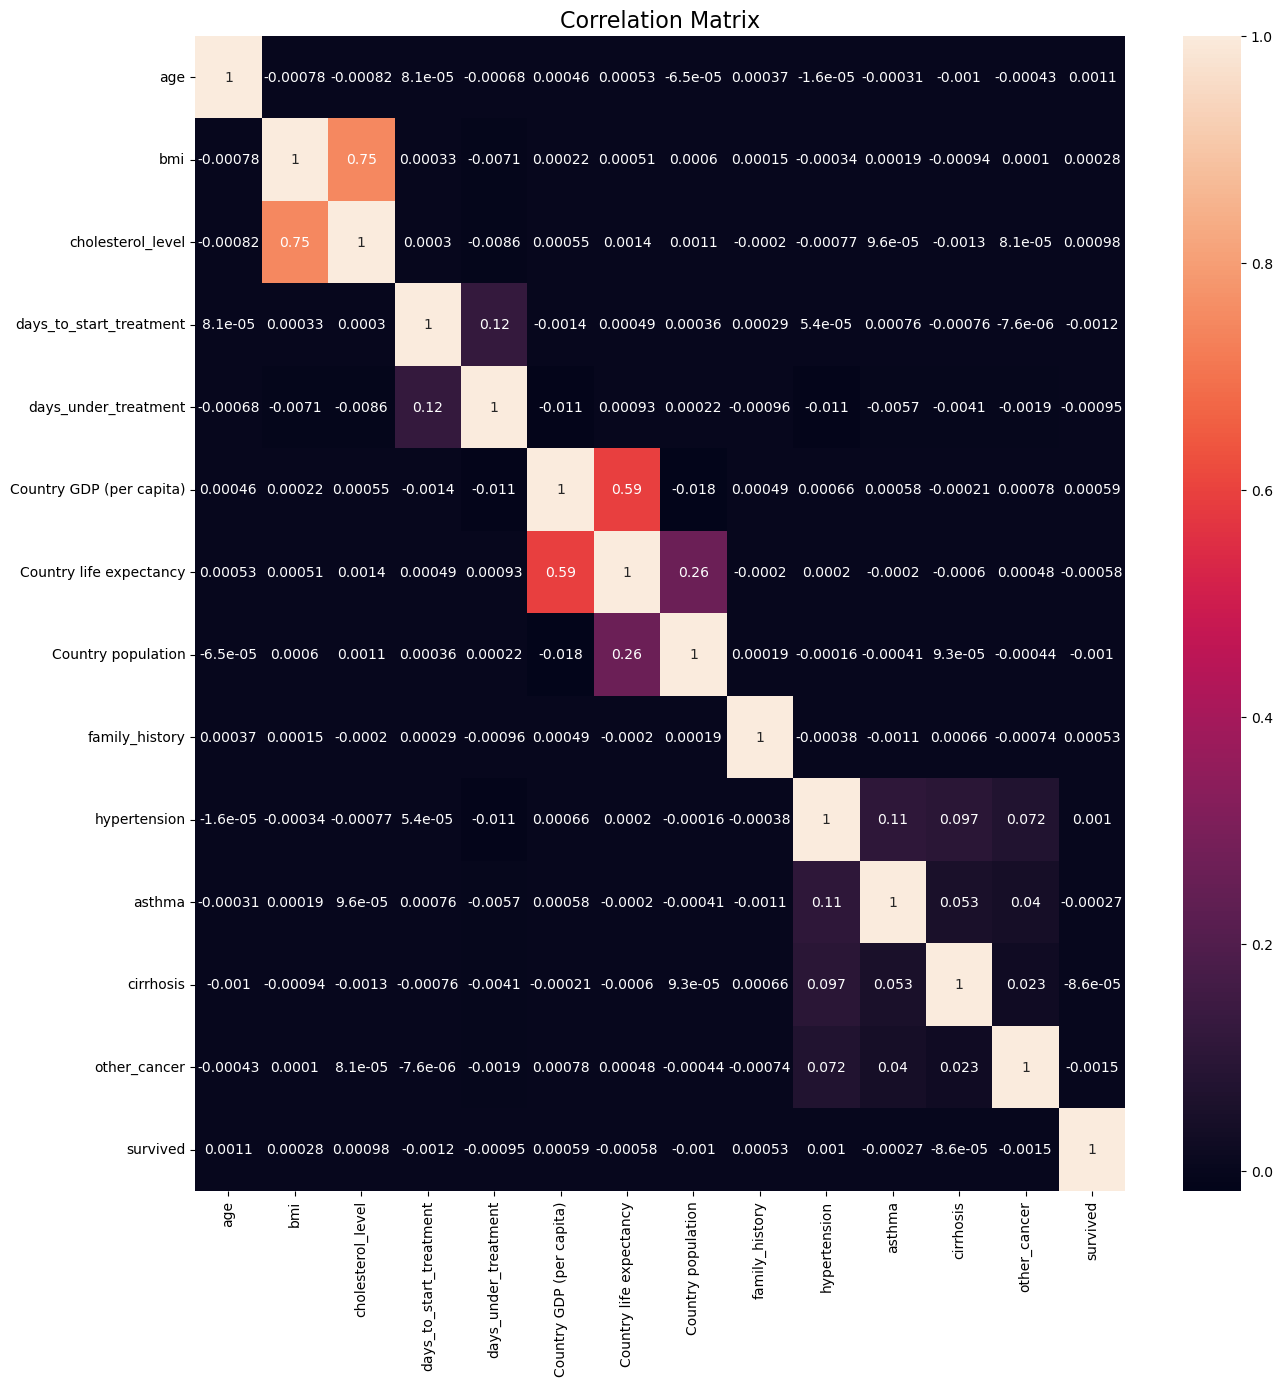

In [32]:
# Create heatmap using Seaborn

f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(sub_all.corr(), annot=True, ax=ax)
plt.title('Correlation Matrix', fontsize=16)

### Subset of Patients who Survived

In [34]:
# Create subset of survived patients with only relevant variables:
sub_survived = df_merged[df_merged['survived'].isin([True])]
sub_survived = sub_survived[['age', 'bmi', 'cholesterol_level', 'days_to_start_treatment', 'days_under_treatment',
                     'Country GDP (per capita)', 'Country life expectancy', 'Country population', 
                     'family_history', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer']]

Text(0.5, 1.0, 'Correlation Matrix - Survived Only')

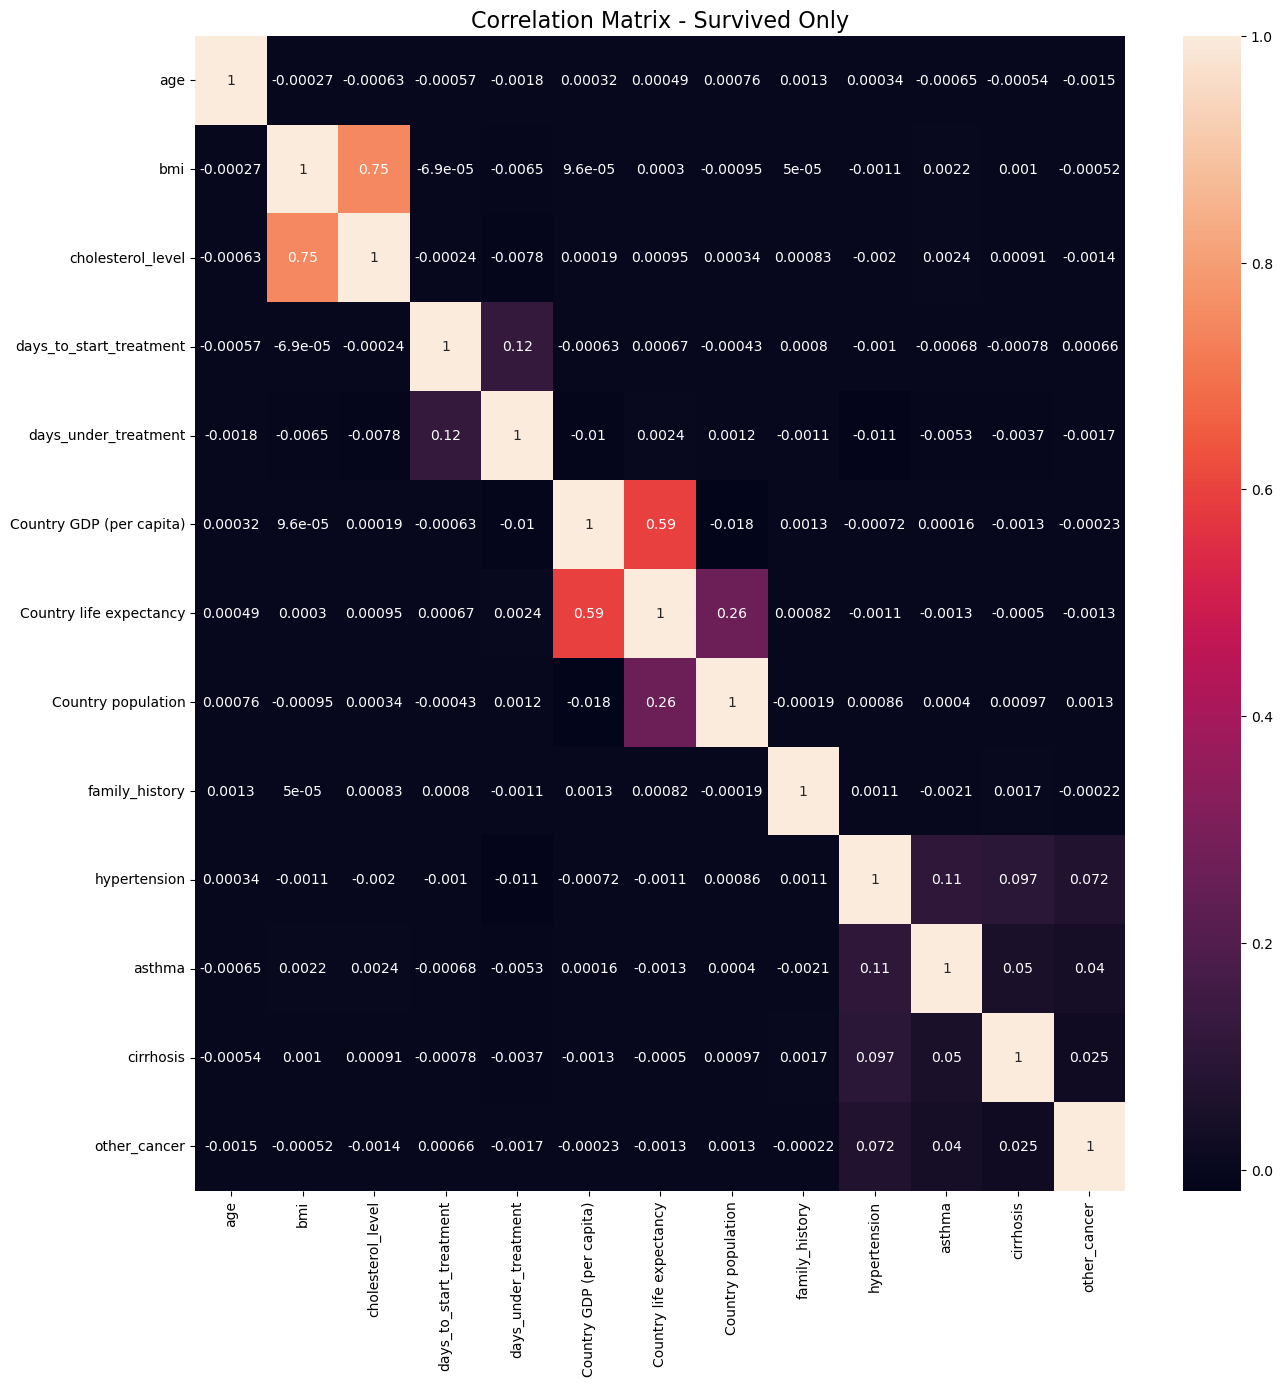

In [36]:
# Generate heatmap
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(sub_survived.corr(), annot=True, ax=ax)
plt.title('Correlation Matrix - Survived Only', fontsize=16)

**Correlations:**
- **BMI & Cholesterol:** Strong positive correlation. This is a logical correlation given than higher BMI tends to indicate obesity (and thus higher concentrations of Low Density Lipids i.e., cholesterol). HOWEVER, this is already well known and does not contribute much to an analysis of lung cancer survival factors.

      - Perhaps there may be a loose connection so other health markers that do significantly affect health outcomes (e.g., hypertension)
- **Age:** No apparent correlations with any other numeric variable.
- **Days to start treatment & Days under treatment:** Very weak positive correlation. Although, I would be interested to see these variables relate to certain categories.
- **Life Expectancy & GDP per capita:** Moderate-Strong positive relationship found. Would indicate that there is a tendency for more prosperous coutries to live longer (possibly due to better living conditions and *healthcare*
- **Population & Life Expectancy:** Weak positive correlation. Not worth delving into and it is likely that some of these more developed European countries like France and Germany are swaying the correlation.

**Note:**
There are no significant differences in the correlation matrx of patients who survived their treatments.

**Takeaway:**
The heatmaps/correlation matrices do not highlight any project-specific insights. Although, GDP has brought to light the impact a countries development has on the life expectancy of its citizens. This may suggest looking at categorical variables relating to healthcare is important for later in this project.

______________________________
**Note from ChatGPT:**

Including boolean values in a correlation matrix or heatmap in Python is generally straightforward, but there are a few considerations to keep in mind:

**1. Representation of Boolean Values:**

Boolean values (True and False) are typically represented as 1 and 0 respectively in numerical contexts. This is important because correlation coefficients are calculated based on numerical values.
Ensure that your boolean values are correctly represented numerically in your dataset before calculating correlations.

**2. Interpretation of Correlation Coefficients:**

Correlation coefficients (e.g., Pearson correlation coefficient) measure the linear relationship between two continuous variables. When applied to boolean values, the coefficient may not always provide meaningful insight because boolean variables are categorical rather than continuous.
In some cases, especially with binary variables, point-biserial correlation or other measures might be more appropriate than Pearson's correlation.

**3. Potential Issues:**

Sparsity: If your dataset has a large number of boolean variables with many False values (sparse data), correlations involving these variables might not provide meaningful insights due to lack of variability.
Interpretation: While correlations involving boolean variables can be calculated, interpreting them should be done cautiously. A high correlation does not imply causation, and the context of the variables involved is crucial for meaningful interpretation.

______________________________

## **4. Scatterplots**

The following will be for the purposes of the exercise and not likely contribute to answering th project questions.

### BMI and Cholesterol

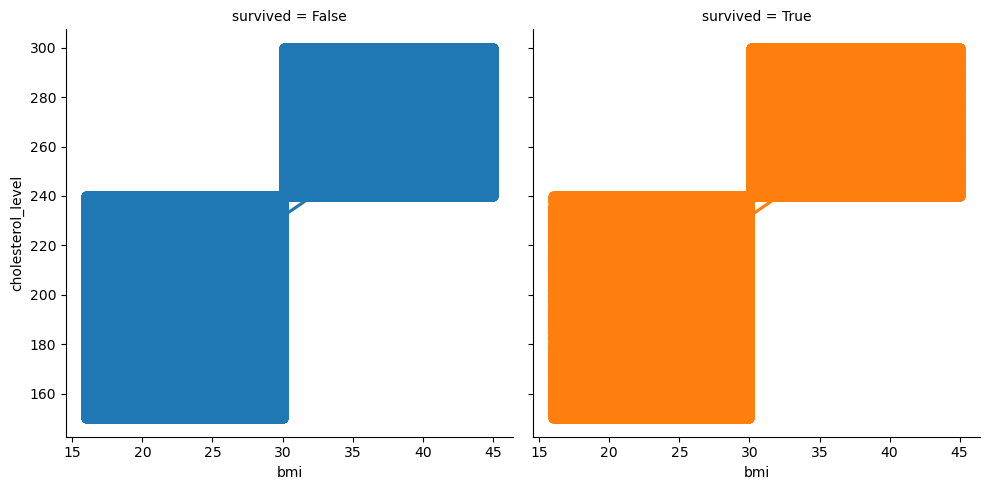

In [18]:
# To show two plots (for the passed and survived patients):

sns.lmplot(x = 'bmi', y = 'cholesterol_level', hue='survived', col='survived', data=df_merged, height=5, aspect=1)

This is a great example of the limitations of artifical datasets. However, ignoring its ridiculous nature, the scatterplots both show that bmi and cholesterol are correlated. Between a BMI of 15 and 30, patient's cholesterol is around 150 to 240 with no clear direction or trend in this range, but after a BMI of 30, patient's cholesterol is around 240 to 300 with no clear direction or trend in this range... ridiculous.

### Life Expectancy and GDP

For the sake of obtaining a possibly more appropriate scatterplot and completing the exercise, these variables will be examined in the same way:

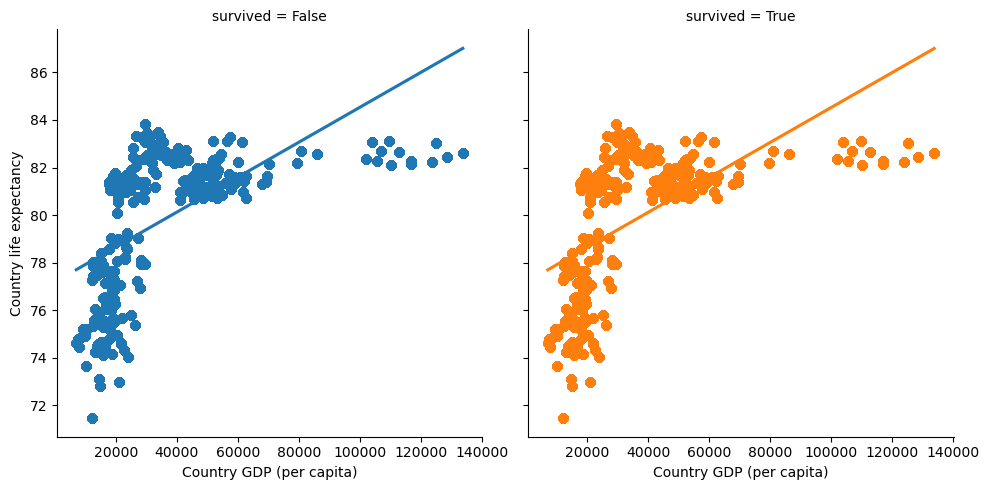

In [19]:
sns.lmplot(x = 'Country GDP (per capita)', y = 'Country life expectancy', hue='survived', col='survived', data=df_merged, height=5, aspect=1)

The scatterplots here show that the correlation between life expectancy and GDP are not linear. There is a sharp rise in life expectancy between a GDP of about 10,000 and 30,000. After this point, life expectancy barely rises even with significant gains in GDP. Oddly, there appears to be a cluster of countries with slightly higher life expectancies at a GDP of around 30,000. This could be attributed to many possible things. I hypothesise that it could indicate people from countries that are well-off enough to take care of basic necessities and health concerns, but aren't prosperous enough to indulge in unhealthy lifestyles, tend to live the longest on average.

## **5. Pair Plots**

Since the dataset is fairly large, and the last graphs have taken a while to load, I am going to make a subset of the full dataframe to help with the next steps

In [20]:
# Set seed to sample data
np.random.seed(4)

In [21]:
# Create a list to be used for dividing the dataset into a big and small representative sample
dev = np.random.rand(len(df_merged)) <= 0.7

In [22]:
# Create small and big sample data frames
small = df_merged[~dev]
big = df_merged[dev]

In [23]:
# Check number of rows in each data frame to ensure it adds up to the number of rows in the original
print(len(df_merged))
print(len(small) + len(big))

2842404
2842404


In [24]:
# Reduce the small sample to only include relevant columns and those that will work be interpretable (no boolean values here)
df_2 = small[['bmi', 'cholesterol_level', 'Country GDP (per capita)', 'Country life expectancy']]
df_2.head(20)

,bmi,cholesterol_level,Country GDP (per capita),Country life expectancy
0,31.093750,257,42136.12079,80.990244
2,18.000000,211,42136.12079,80.990244
3,39.500000,247,42136.12079,80.990244
6,20.296875,185,42136.12079,80.990244
10,26.703125,227,42136.12079,80.990244
12,31.203125,272,42136.12079,80.990244
13,30.406250,264,42136.12079,80.990244
19,34.906250,262,42136.12079,80.990244
21,32.906250,248,42136.12079,80.990244
22,33.500000,278,42136.12079,80.990244


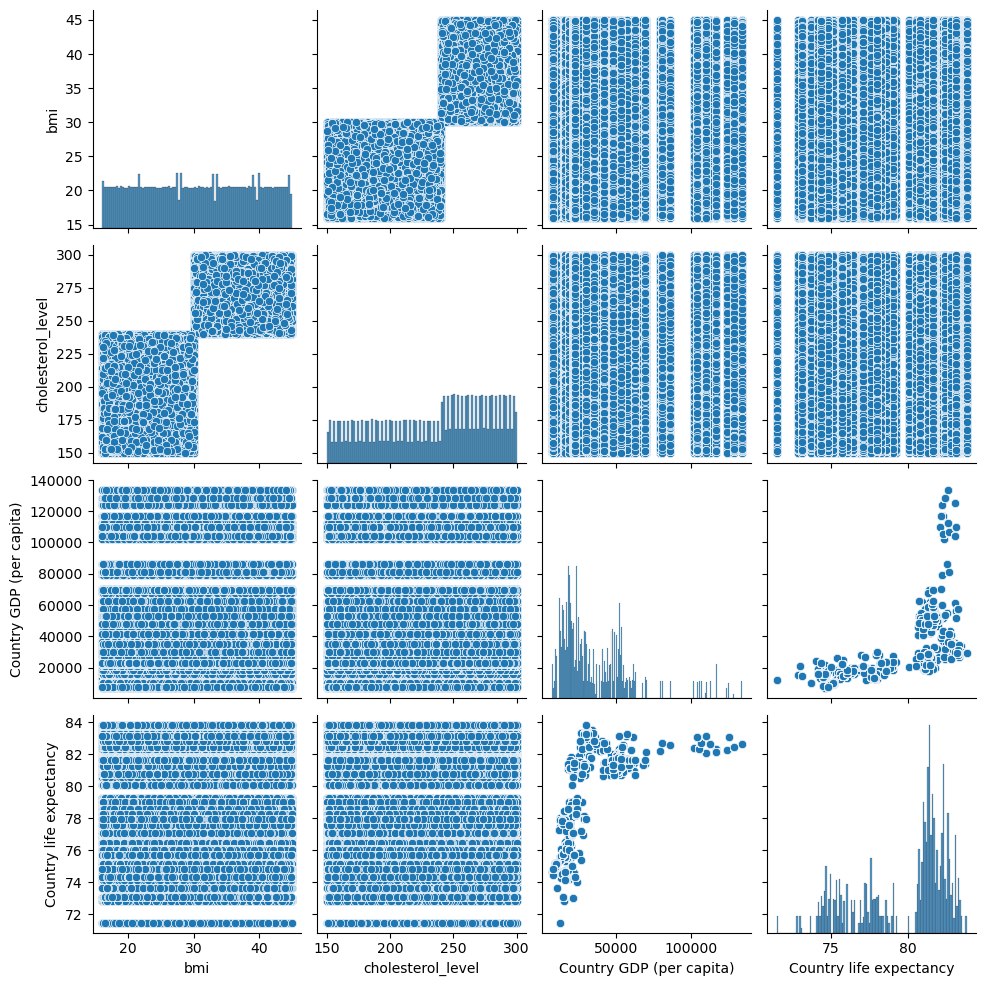

In [25]:
# Create pair plot
sns.pairplot(df_2)

As could probably be expected at this point, all data originating from the lung cancer dataset is so extremely clustered and shows potential issues with its generation.

**BMI:** Strangely evenly distributed with random spikes. Points are too densely packed to make any clear observation. A chart showing density more clearly may be better.

**Cholesterol:** Sudden increase in the number of patients with higher cholesterol (240 and above). However, the pattern in distribution is odd and shows an issue with the way the data was generated. Point density is also too high for observations to be drawn from other variables.

**Country GDP:** High volume of countries with lower GDPs 

- This might have led to insight regarding the distribution of lung cancer patients, however, it is important to note here that the distribution of all lung cancer patients is nearly evenly distributed across all 27 countries (again, perhaps an issue with the way the data was generated). If anything, this histogram is just a reflection of the GDP's of the selected European countries.

**Country Life Expectancy:** Countries tend to have higher life expectancies (above 80 years). Again, this does not provide much in the way of insight.

***Conclusion:*** I think the dataset (despite having other issues) is too large for scatterplot-type graphs. Maybe a distribution curve would be more suitable. For this task, I'm also meant to mark the variables I'd like to explore further but based on this pair plot, I don't think I can provide a good reason for selecting any. I suppose I'll look further into previously disregarded variables (such as days_under_treatment)

## **6. Categorical Plot**

Text(0.5, 1.0, 'Treatment Duration (in days)')

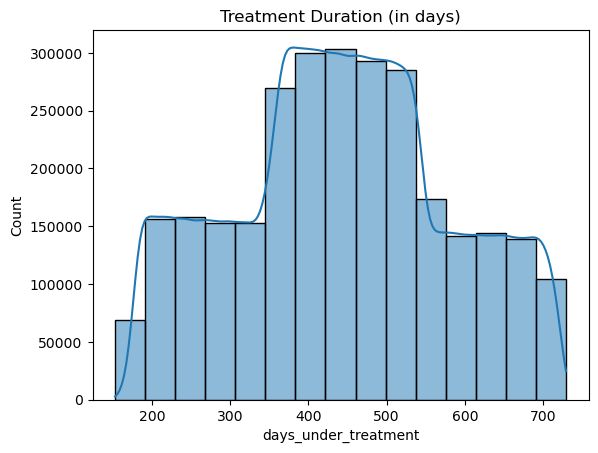

In [38]:
# Start by using a histogram to visualise the distribution of days_under_treatment

sns.histplot(df_merged['days_under_treatment'], bins = 15, kde=True)
plt.title('Treatment Duration (in days)')

Based on the histogram, the following categories would seem sensible for a new column "treatment_duration":

- Short = less than 350 days
- Medium = 350 to 550 days
- Long = More than 550 days

In [40]:
df_merged.loc[df_merged['days_under_treatment'] < 350, 'treatment_duration'] = "Short"
df_merged.loc[(df_merged['days_under_treatment'] >= 350) & (df_merged['days_under_treatment'] <= 550), 'treatment_duration'] = "Medium"
df_merged.loc[df_merged['days_under_treatment'] > 550, 'treatment_duration'] = "Long"

In [42]:
# Check value counts
df_merged['treatment_duration'].value_counts(dropna=False)

treatment_duration
Medium    1505681
Short      713515
Long       623208
Name: count, dtype: int64

### Treatment Duration vs Country GDP

/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


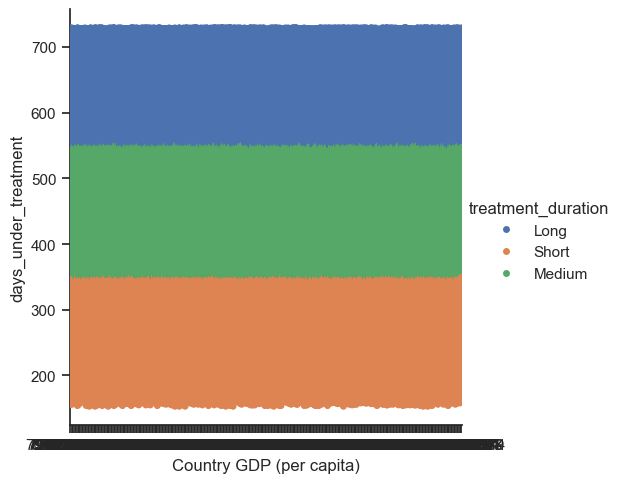

In [44]:
# make a categorical plot to see if there is a connection between treatment duration and country wealth
sns.set(style="ticks")
catplot = sns.catplot(x = 'Country GDP (per capita)', y = 'days_under_treatment', hue = 'treatment_duration', data=df_merged)

Remembering back to the heatmap... this should have been expected. No correlation

### BMI vs Cholesterol

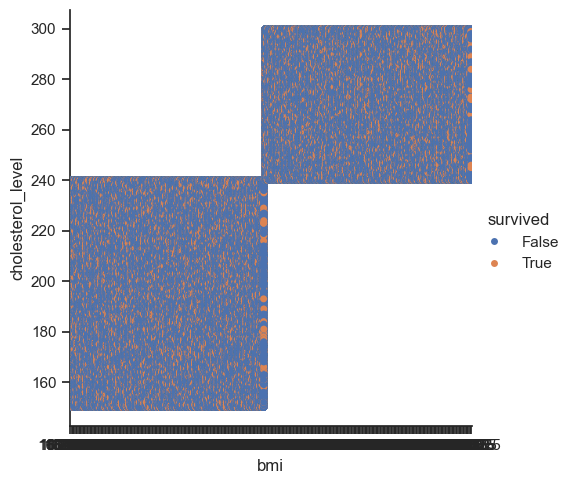

In [46]:
# maybe looking at bmi and cholesterol with 'survived' as the hue could create an insight
sns.set(style="ticks")
df_merged['bmi'] = df_merged['bmi'].astype(np.float32)
catplot = sns.catplot(x = 'bmi', y = 'cholesterol_level', hue = 'survived', data=df_merged)

I would say that there appears to be no relationship between whether a patient survived and either there cholesterol or bmi. However, the data is extremely tightly packed and is one of the limitations of this type of graph (it doesn't work very well with very large datasets)

## **7. Project Questions and Their Answers**

The above analysis did little to answer any project questions in the demographic section as these questions mostly focus on categorical variables within the data such as health markers and treatment received. Also, most of the above graphs seem to be better suited for analyzing purely numerical values (hence why house price data was used in the exercise).

However, health markers can include BMI and cholesterol, for which the above "cat plot" shows no real indication of affecting survivability.

To answer the question "Which age groups are most affected by lung cancer?", it could be argued that all ages are impacted the same since the dataset is normally distributed in terms of age which is reflective of real populations. However, A much more intensive analysis of the distribution of each country's population and comparing this to the dataset may not even be worthwhile due to the issues with how the data was generated.

From here, I can't think of any further questions to add

## **8. Hypotheses So Far**

So far, the analysis has not given me much to work with. So my hypotheses will focus more on other factors:

**1)** Patients with hypertension are more at risk of dying from lung cancer.

**2)** Patients who are smokers (current and casual) are more at risk from dying of lung cancer.

**3)** Patients who are diagnosed early are more likely to recover.

**4)** Patients with multiple other medical conditions (a combination of asthma, family history, hypertension, etc...) are more likely to die from lung cancer.

## **9. Check and Export Data**

In [48]:
pd.set_option('display.max_columns', None) # allows all columns to be displayed
df_merged.head()

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,chronologically_sound,days_to_start_treatment,days_under_treatment,Country GDP (per capita),Country GDP annual growth %,Country life expectancy,Country population,treatment_duration
0,64,Female,Germany,2016-04-07,Stage III,2016-04-21,False,Never Smoked,31.09375,257,True,True,False,False,Combined,2017-11-15,False,True,14,573,42136.12079,2.230000,80.990244,82348669,Long
1,50,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,True,Passive Smoker,25.90625,208,True,False,False,False,Radiation,2024-04-25,False,True,10,359,28279.57871,-0.128312,78.129715,10647720,Medium
2,51,Female,Latvia,2016-02-07,Stage III,2016-02-13,True,Former Smoker,34.59375,249,True,True,True,False,Surgery,2017-04-14,True,True,6,426,14331.75159,2.368615,74.580488,1959537,Medium
3,50,Male,Finland,2023-01-04,Stage II,2023-01-12,True,Never Smoked,32.59375,300,True,True,False,False,Radiation,2024-03-11,False,True,8,424,52292.81851,1.300216,81.231138,5570791,Medium
4,49,Male,Denmark,2018-05-23,Stage IV,2018-05-30,False,Former Smoker,30.09375,300,True,True,False,True,Chemotherapy,2019-07-07,False,True,7,403,61591.92887,1.989537,80.953659,5793636,Medium


In [50]:
# drop annual growth GDP column
df_merged.drop('Country GDP annual growth %', axis = 1, inplace=True)

In [52]:
df_merged.head()

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,chronologically_sound,days_to_start_treatment,days_under_treatment,Country GDP (per capita),Country life expectancy,Country population,treatment_duration
0,64,Female,Germany,2016-04-07,Stage III,2016-04-21,False,Never Smoked,31.09375,257,True,True,False,False,Combined,2017-11-15,False,True,14,573,42136.12079,80.990244,82348669,Long
1,50,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,True,Passive Smoker,25.90625,208,True,False,False,False,Radiation,2024-04-25,False,True,10,359,28279.57871,78.129715,10647720,Medium
2,51,Female,Latvia,2016-02-07,Stage III,2016-02-13,True,Former Smoker,34.59375,249,True,True,True,False,Surgery,2017-04-14,True,True,6,426,14331.75159,74.580488,1959537,Medium
3,50,Male,Finland,2023-01-04,Stage II,2023-01-12,True,Never Smoked,32.59375,300,True,True,False,False,Radiation,2024-03-11,False,True,8,424,52292.81851,81.231138,5570791,Medium
4,49,Male,Denmark,2018-05-23,Stage IV,2018-05-30,False,Former Smoker,30.09375,300,True,True,False,True,Chemotherapy,2019-07-07,False,True,7,403,61591.92887,80.953659,5793636,Medium


In [54]:
# Export
df_merged.to_pickle(os.path.join(path, 'Prepared Data', 'Lung_cancer_merged_v1.pkl'))

### Correlation Coefficients

For my final Task in this project, I will need to create a Tableau Storyboard with the major elements of this analysis. This includes recreating the above correlation matrix/heatmap in Tableau.

In [58]:
# Calculate correlation matrix
corr_matrix = sub_all.corr()

# Melt the correlation matrix into a long format
corr_melted = corr_matrix.reset_index().melt(id_vars='index')
corr_melted.columns = ['Variable1', 'Variable2', 'Correlation']

In [60]:
# Save the melted correlation matrix to a CSV file
corr_melted.to_csv(os.path.join(path, 'Prepared Data', 'correlation_matrix.csv'), index = False)